<a href="https://colab.research.google.com/github/W3ndy42/Easy-Visa/blob/main/DSBA_Project_ET_EasyVisa_Fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## Data Overview

### Reading the dataset

In [ ]:
dt = pd.read_csv('/content/EasyVisa.csv')

In [ ]:
data = dt.copy()

### Overview of the dataset

### First and last 5 rows of the dataset

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Undestanding the shape of the dataset

In [ ]:
data.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns.

### Checking the types of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations:  **

* This dataset has 3 numeric and 9 object columns.
* There are no null values.
* We can convert the objects into category values.

### Looking for null values

In [ ]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no null values in the data.

### Checking for duplicate values

In [ ]:
data.duplicated().sum()

0

* There are no duplicate values in the data.

### Fixing the datatypes

In [ ]:
#Selec all the columns object types
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
# Changing the datatype object to category
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


### Summary of the dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* Company established years are between 1800 and 2016.
* The number of employees has a mean of 5667.0432 and a max of 602069, indicating that big companies do this type of application.
* Some companies report a negative number of employees. We will be sure to follow up on this later.
* Prevailing wage has a mean of 74455.8145. There is a big difference between the minimum and maximum wages since they vary depending on whether the wage is hourly, weekly, monthly, or yearly.

In [ ]:
data.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


* Case ID is an ID variable unsuitable for a predictive model.
* Continent, the majority of employees on our data come from Asia.
* Most employees have a bachelor's degree in education.
* Most of the employees do not require training.
* 89%  are full-time positions.
* There are 67 % of certified case status in our data.
* Most employees require an annual salary or wage.

In [ ]:
#dropping Case ID
data.drop(["case_id"], axis=1, inplace=True)

In [ ]:
#Selec all the columns object types
cols = data.select_dtypes(['category'])
cols.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**Let's look at the unique values of all the categories**

In [ ]:
for i in cols.columns:
    print('Unique values in',i, 'are :')
    print(cols[i].value_counts())
    print('*'*50)

Unique values in continent are :
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in education_of_employee are :
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in has_job_experience are :
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in requires_job_training are :
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
**************************************************
Unique values in region_of_employment are :
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
*******

## Exploratory Data Analysis (EDA)

### **The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariete Analysis

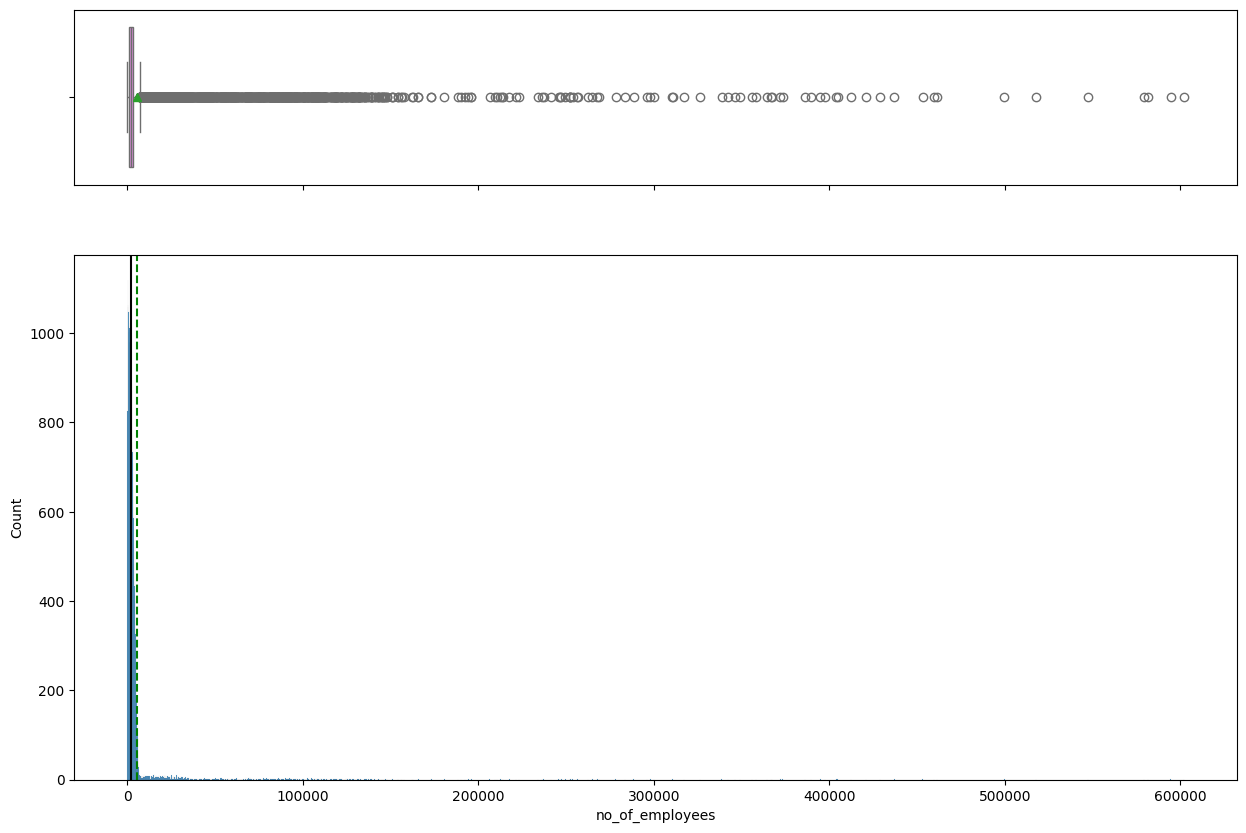

In [ ]:
histogram_boxplot(data, 'no_of_employees')

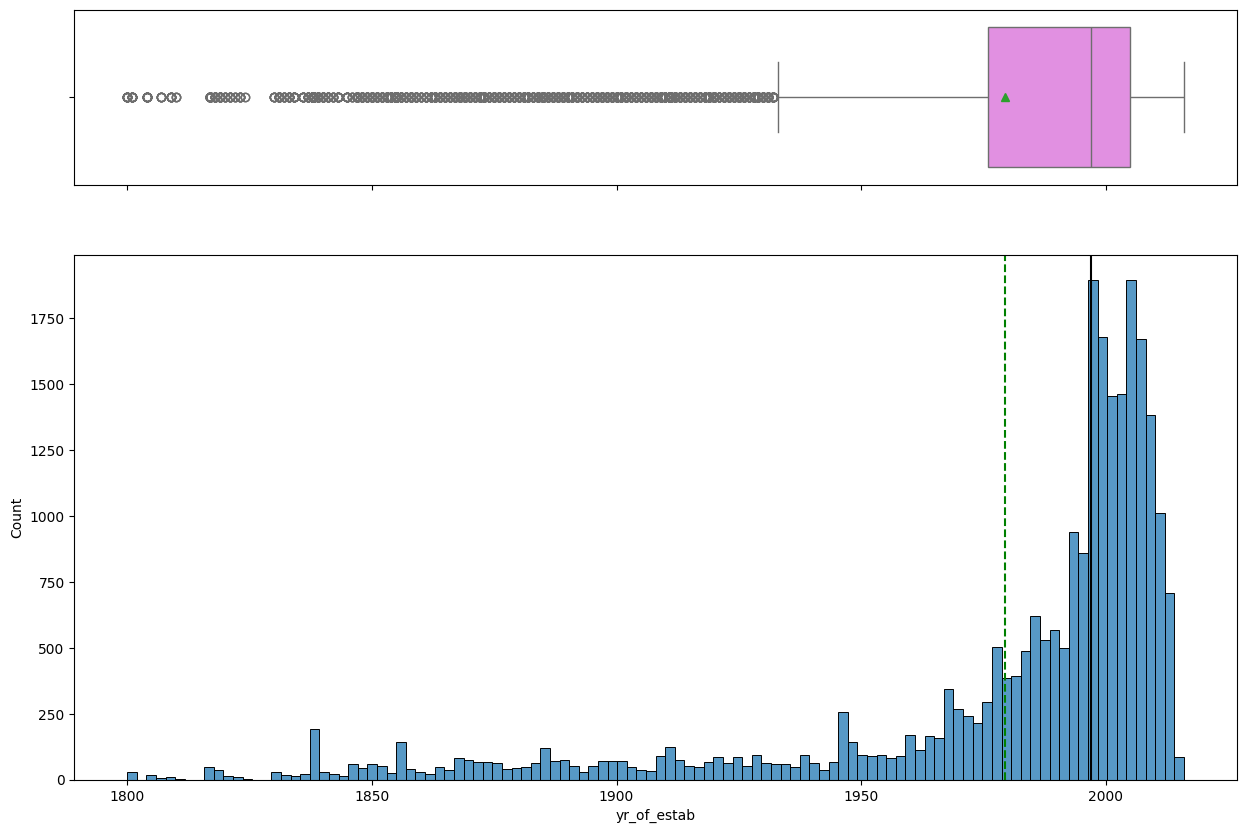

In [ ]:
histogram_boxplot(data, 'yr_of_estab')

* The distribution of establishment years is left-skewed, with outliers present due to some companies being established in 1800.
* Most companies have been established from 1950 to 2016.

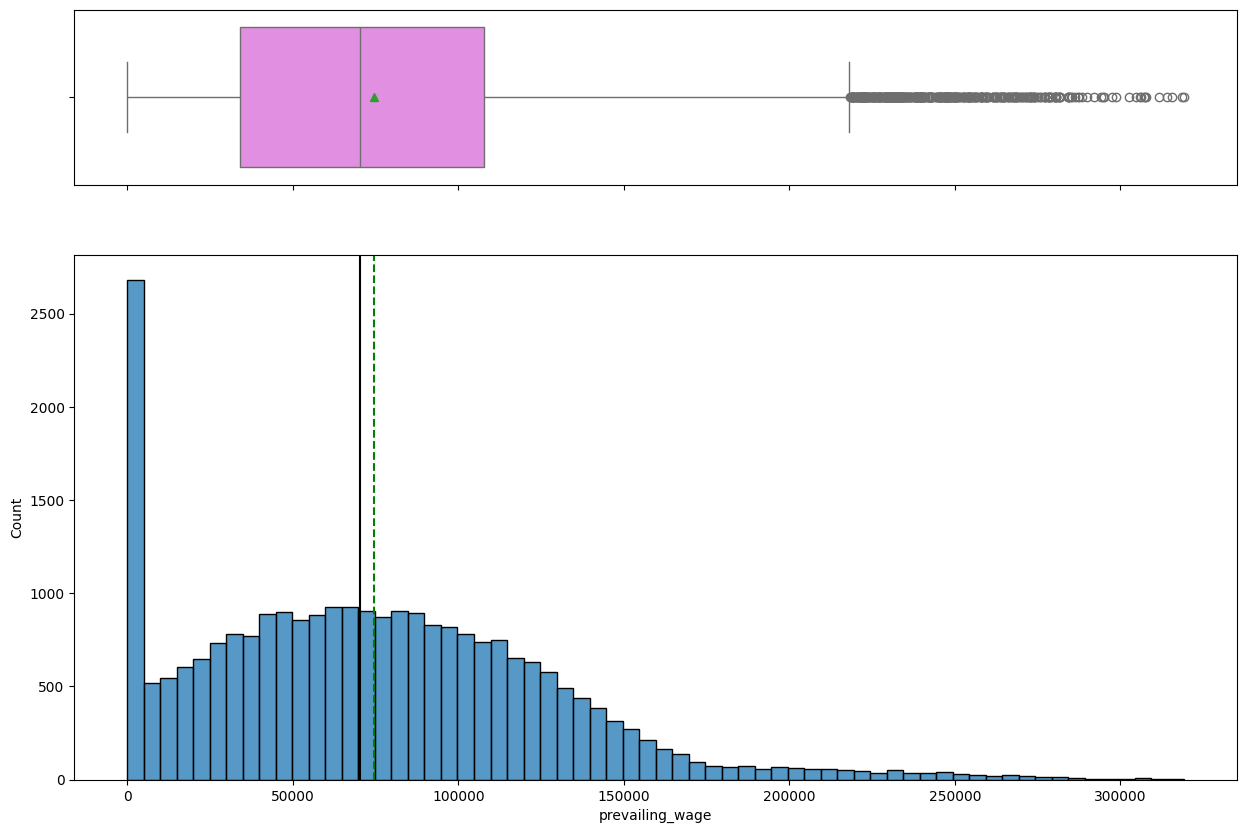

In [ ]:
histogram_boxplot(data, 'prevailing_wage')

* Prevailing wage distribution has a right-skewed with outliers present.

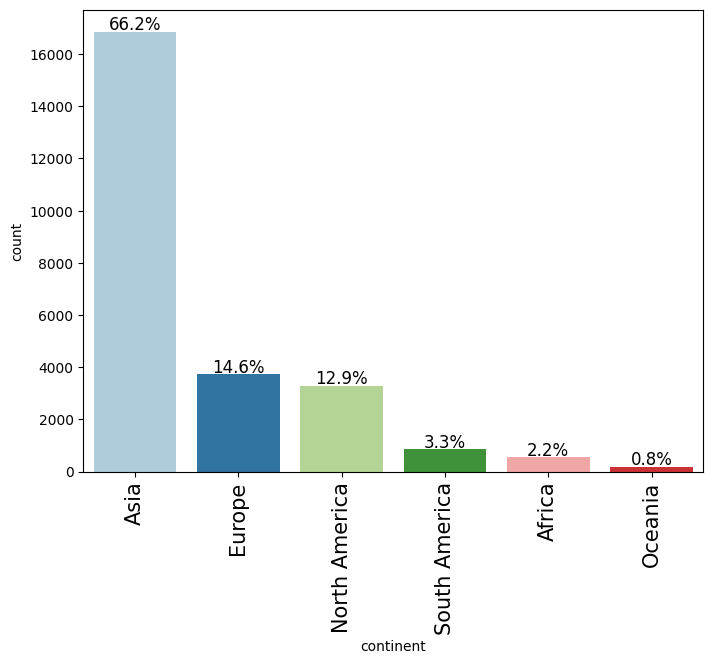

In [ ]:
labeled_barplot(data, 'continent', perc=True)

* The majority of employees in our database are from Asia with the 66.2%.
* Only .8% are from oceania.

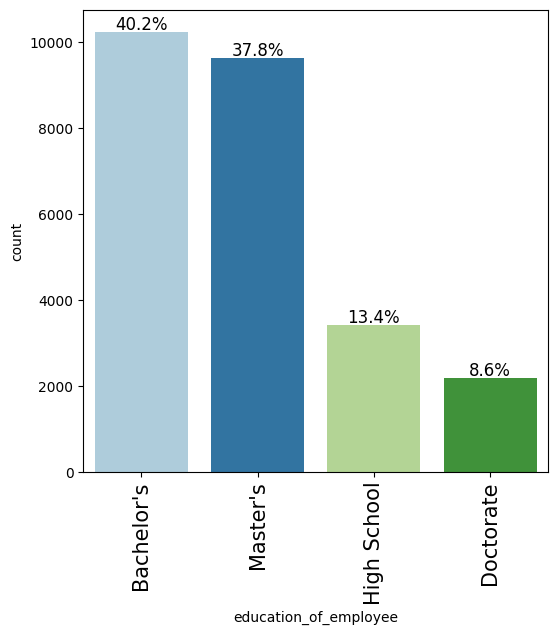

In [ ]:
labeled_barplot(data, 'education_of_employee', perc=True)

* 40% of employees have bachelor's degrees.
* Only 8.6% have a doctorate as a higher education.
* 37.8% of employees hold a master's degree.

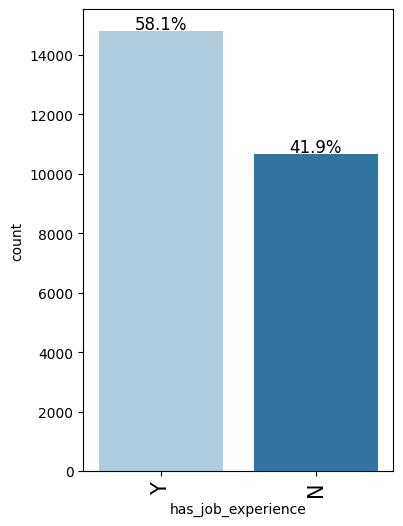

In [ ]:
labeled_barplot(data, 'has_job_experience', perc=True)

* Only 58.1% have job experience.

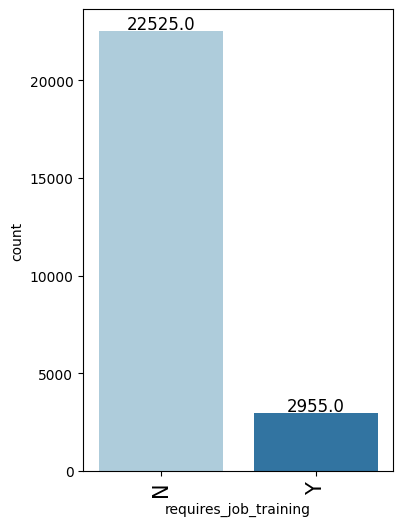

In [ ]:
labeled_barplot(data, 'requires_job_training')

* Most of the employees do not require job training.


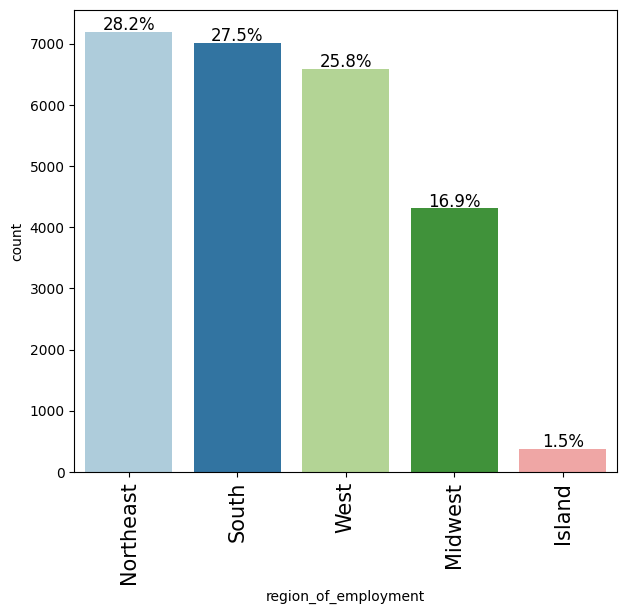

In [ ]:
labeled_barplot(data, 'region_of_employment', perc=True)

* The northeast and south regions are leading in employment opportunities.

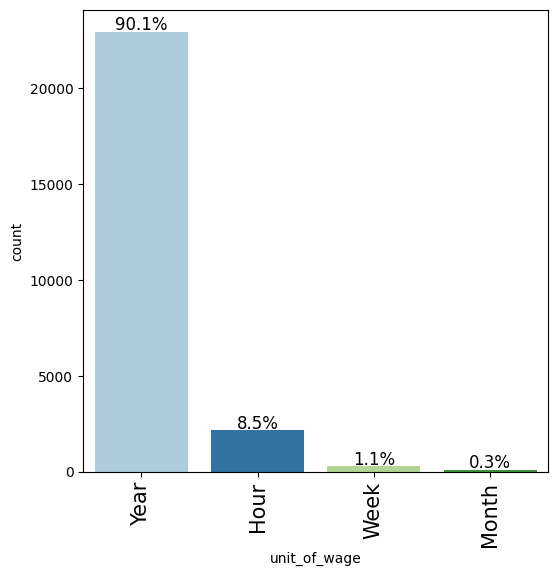

In [ ]:
labeled_barplot(data, 'unit_of_wage', perc=True)

* Most common unit of wage is yearly with 90.1%.

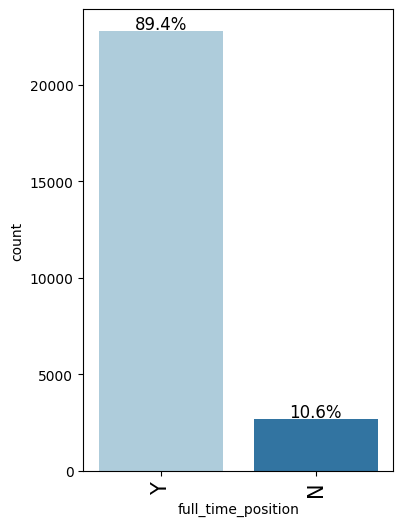

In [ ]:
labeled_barplot(data, 'full_time_position', perc=True)

* 89.4% of employees are in full-time positions.

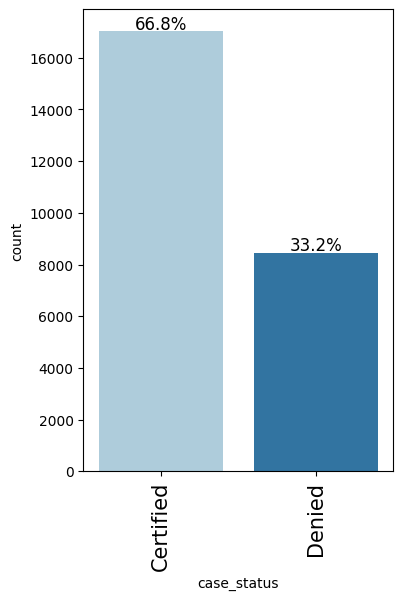

In [ ]:
labeled_barplot(data, 'case_status', perc=True)

* 66.8% of the employees are certified in our data.

### Bivariate Analysis

#### Correlation check

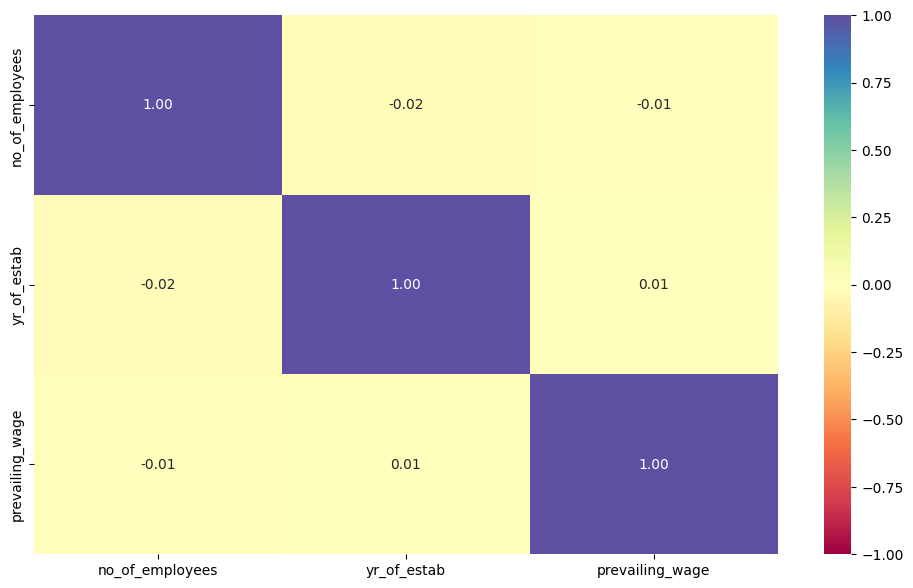

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is no strong or positive correlation between these numerical variables.

#### Case status VS Job experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


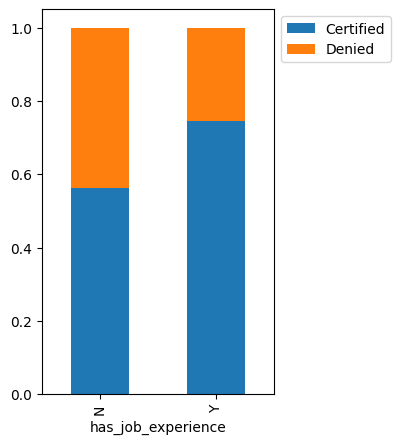

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status')

* There are more certified cases when the employee has job experience.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


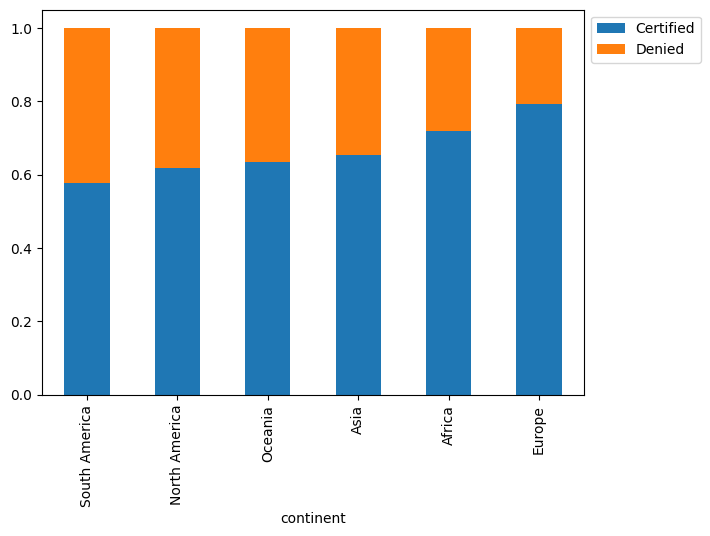

In [ ]:
stacked_barplot(data, 'continent', 'case_status')

* The mayor number of applicants come from Asia.
* The continent with more visa certification is Europe.


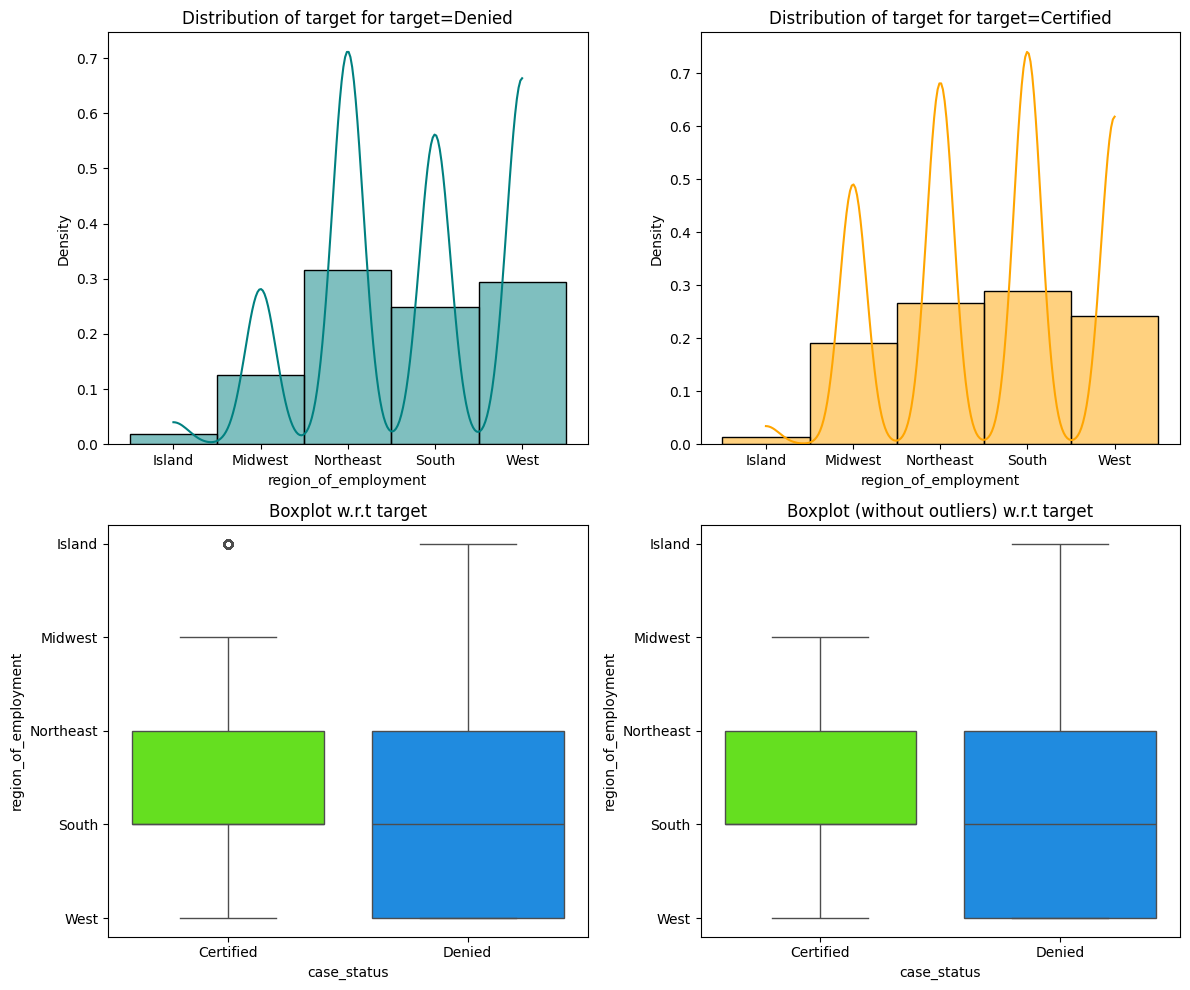

In [ ]:
distribution_plot_wrt_target(data, "region_of_employment", "case_status")

### Education vs Case status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


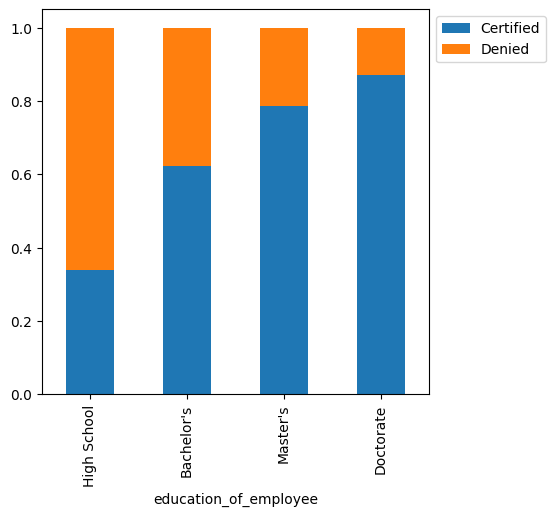

In [ ]:
# Does education play a role in Visa certification?
stacked_barplot(data, 'education_of_employee', 'case_status')

* Seems that the level of education plays an important role in the case status, the greater education, the greater the number of certified visas.

### Continent vs Case status

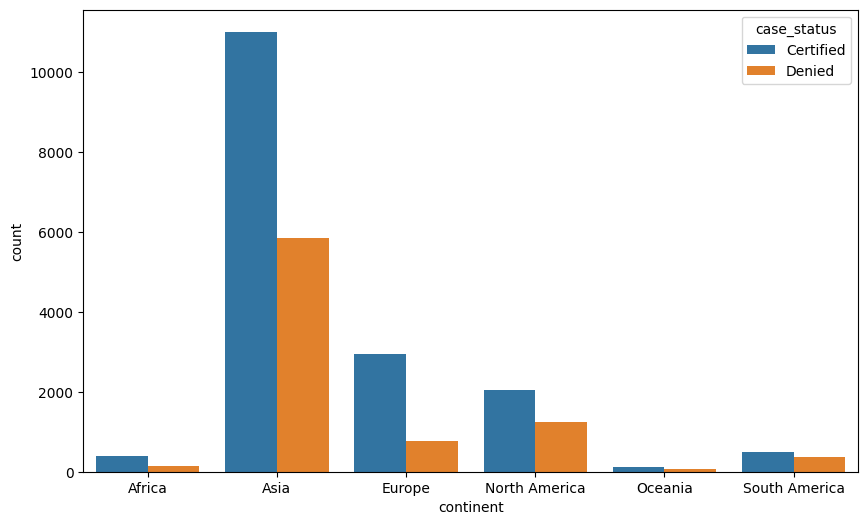

In [ ]:
# How does the visa status vary across different continents?
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=data['continent'], palette='tab10', hue='case_status');
plt.show()


* We observe a significant difference in the plot for the Asia and Europe continent in certified cases compared to other continents.
* The least number of applicants come from Oceania.

### Job Experience vs Case status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


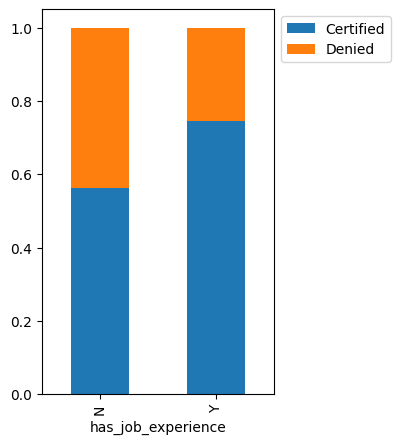

In [ ]:
# Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
stacked_barplot(data, 'has_job_experience', 'case_status')

* Job experience influences visa status, more certified cases have job experience.  

### Unit of wage vs Case status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


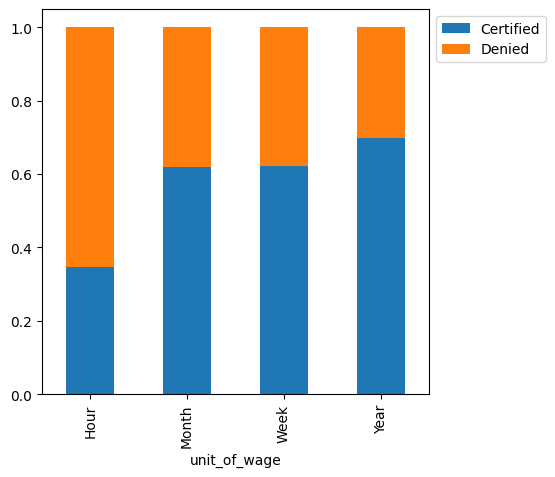

In [ ]:
# In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
stacked_barplot(data, 'unit_of_wage', 'case_status')

* As we can observe in the plot, the yearly wave unit has the most certified cases.

### Prevailing wage vs Case status

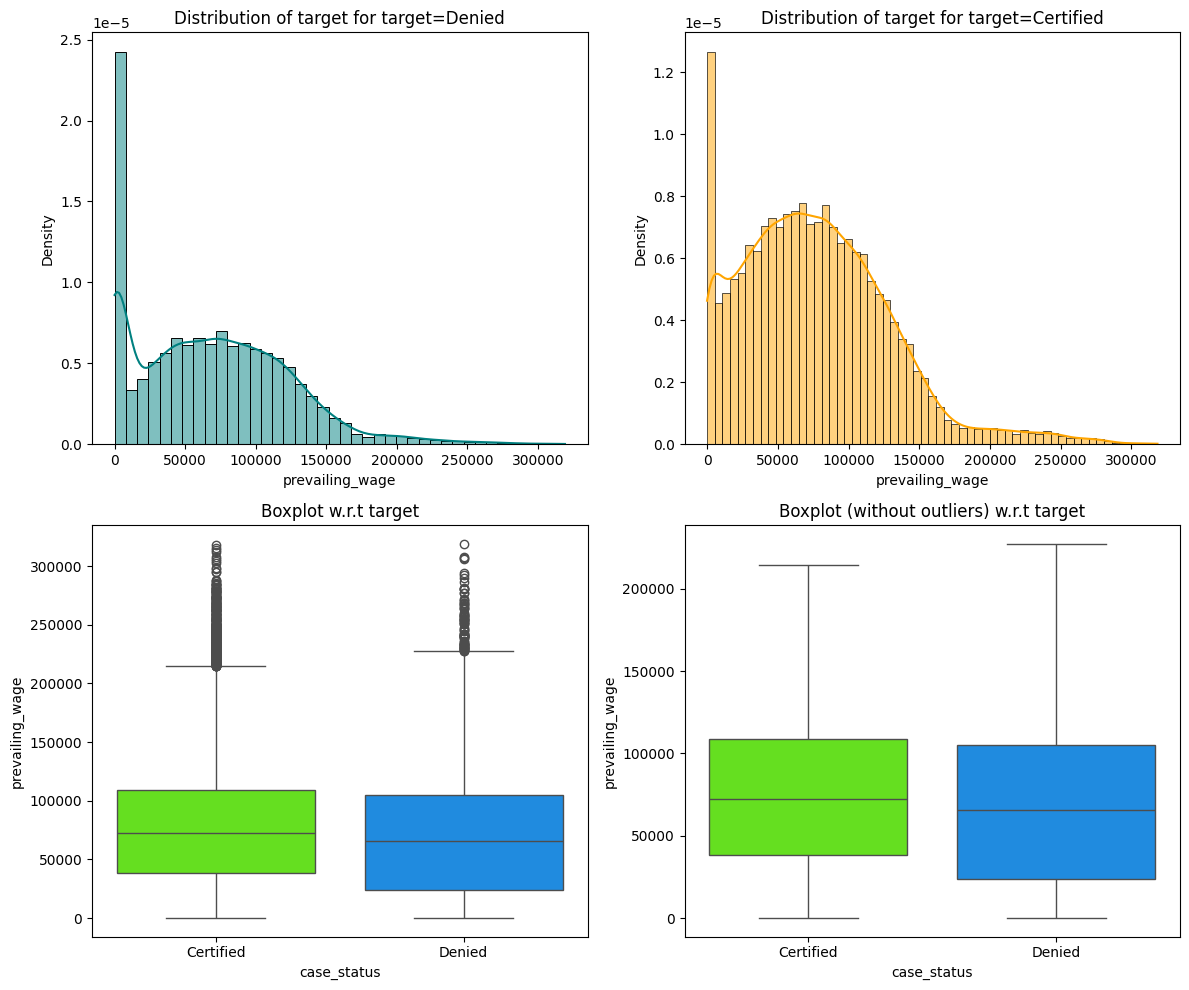

In [ ]:
# The US government has established a prevailing wage to protect local talent and foreign workers.
# How does the visa status change with the prevailing wage?

distribution_plot_wrt_target(data, "prevailing_wage", "case_status")


* Those with a higher prevailing wage are more likely to be certified than those with a lower wage.


### EDA takeaways and recommendations

* Level of education plays an important role in the case status, the greater education, the greater the number of certified visas.
* The northeast and south regions are leading in employment opportunities and certified cases.
* The least number of applicants come from Oceania.
* 40% of employees have bachelor's degrees.
* Only 8.6% have a doctorate as a higher education.
* 37.8% of employees hold a master's degree.
* Most of the applicants have job experience, this is an important factor.
* 89%  are full-time positions.
* Some factors like education level, job experience, and continent are relevant at the time to be certified or denied in the visa process.
* It might be interesting to collect more information related to employee benefits to see if it changes depending on the unit of wage, and if this makes a difference in visa case status, to increase the accuracy of the prediction.


## Data Preprocessing

In [ ]:
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There is not missing data in our data set.

In [ ]:
#Checking all negatives values on employees number
data[data['no_of_employees'] < 0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [ ]:
#Transform all negative values in a number of employees column into positive
data['no_of_employees'] = data['no_of_employees'].abs()

#### Outlier Detection and Treatment

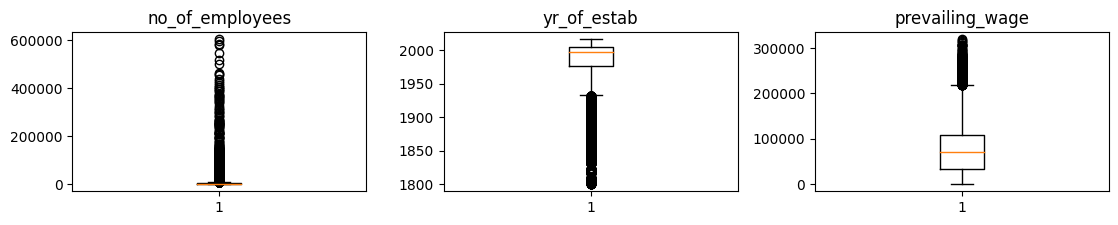

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There is outliers in the data. However, we will not treat them as they are proper values.

## Preparing data for modeling

In [ ]:
data['education_of_employee'] = data['education_of_employee'].apply(lambda x : 1 if x=="Bachelor's" else (2 if x=="High School" else  (3 if x == "Master's" else 4)))
data['has_job_experience'] = data['has_job_experience'].apply(lambda x : 1 if x=="Y" else 0)

In [ ]:
data['case_status'] = data['case_status'].apply(lambda x : 1 if x=='Certified' else 0)

X = data.drop(['case_status'],axis=1)
y = data['case_status']

X = pd.get_dummies(X,drop_first=True)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [ ]:
y.value_counts(1)

case_status
1    0.667896
0    0.332104
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(1)

case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64

## EDA

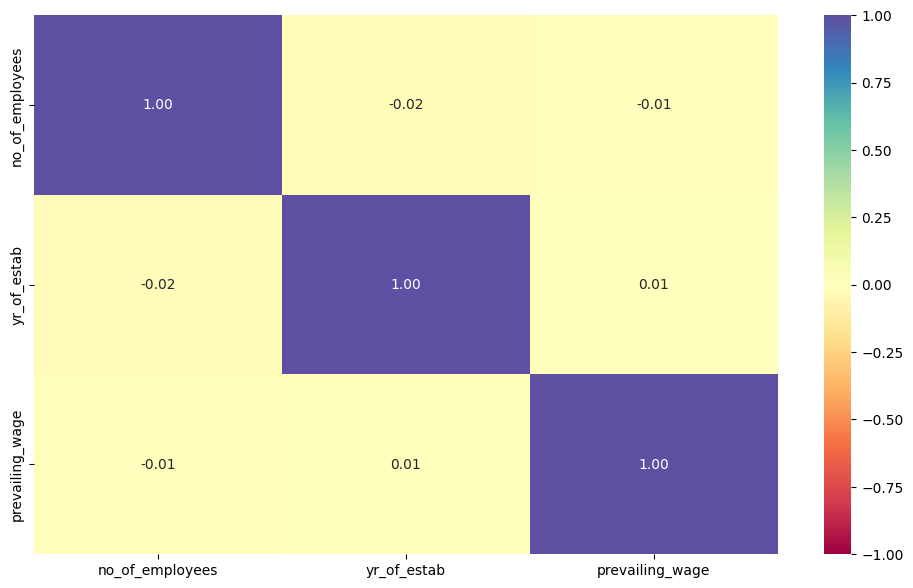

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Model evaluation criterion



 ### Model can make wrong predictions as:
1. Predicting a visa will be certified when it should be denied.
2. Predicting a visa will be denied when it should be certified.

### Which case is more important?
* Predicting that a visa will be approved when it won't be, or vice versa.

### How to reduce the losses?
The F1 score is a useful metric for measuring the performance of classification models, as we try to reduce false positives and false negatives in this case.

## Building bagging and boosting models

#### **Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini', random_state=1)

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

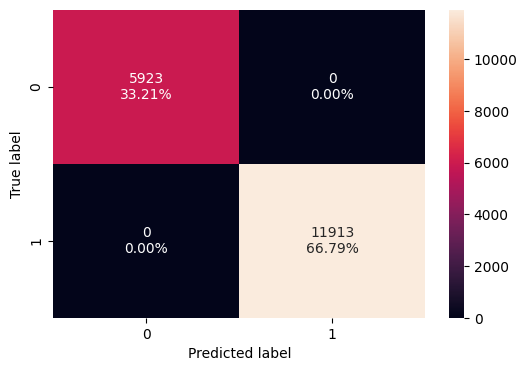

In [ ]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


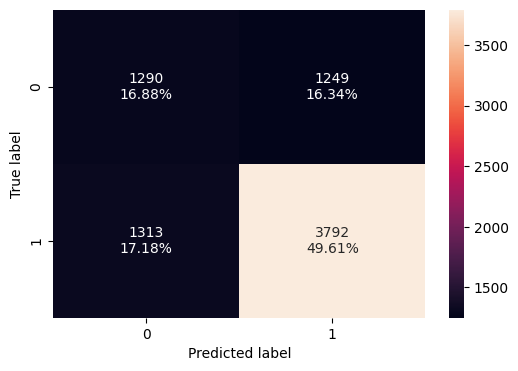

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


* The decision tree performs well on the training data, but there is a significant disparity compared to the test set, indicating overfitting.
* Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### Tuning Decision Tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(criterion='gini',class_weight={0:0.34,1:0.66},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(5,20,18),
              'min_samples_leaf': [3,5],
              'max_leaf_nodes' : np.arange(2, 18,22),
              'min_samples_split': [150, 100, 400],
              'min_impurity_decrease': [0.0001,0.01]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score )

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.34, 1: 0.66}, max_depth=5,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       min_samples_leaf=3, min_samples_split=150,
                       random_state=1)

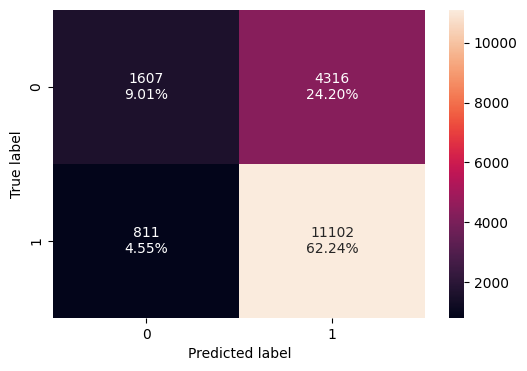

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


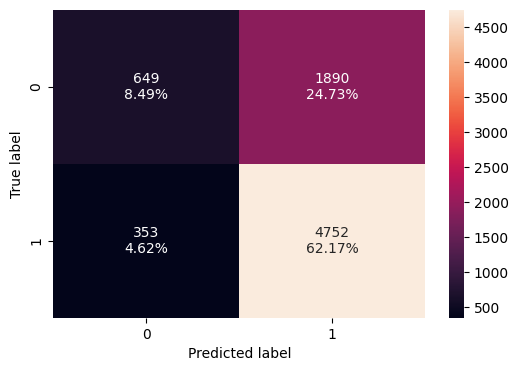

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [ ]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


* Overfitting is reduced after tuning significantly, and recall has a good score. Let's check if the F1_score can be improved with other models.

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=1, oob_score=True)
bagging.fit(X_train,y_train)

BaggingClassifier(oob_score=True, random_state=1)

In [ ]:
bagging.oob_score_

0.6684234133213725

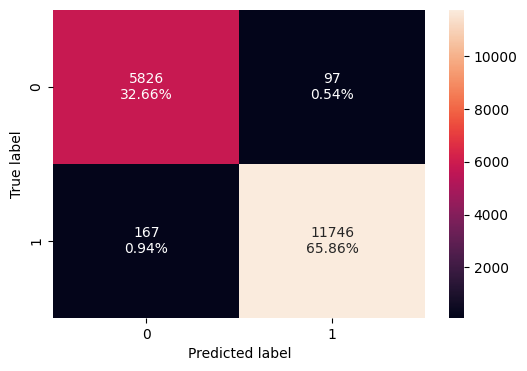

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


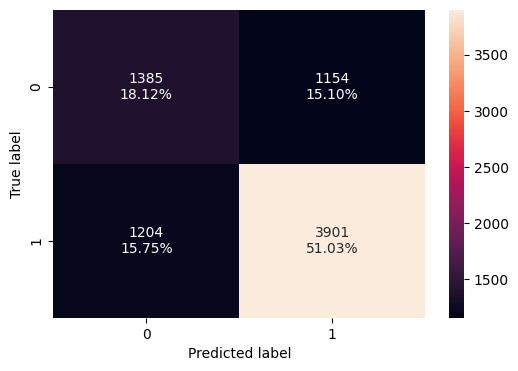

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


* Bagging classifier performs well on the training data but the performance drops significantly on test data indicating a huge overfitting.
* This model show a poor performance on test data.


**Bagging Classifier with weighted decision tree**

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.34,1:0.66},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.34,
                                                                      1: 0.66},
                                                        random_state=1),
                  random_state=1)

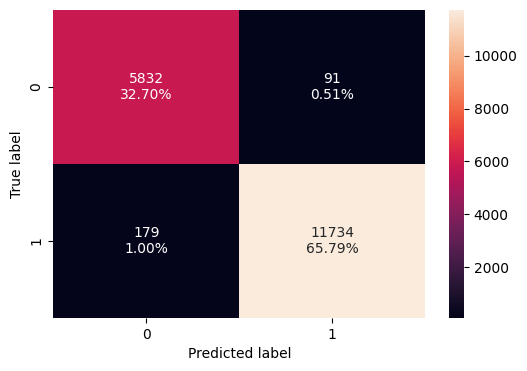

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [ ]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.984862  0.984974   0.992304  0.988626


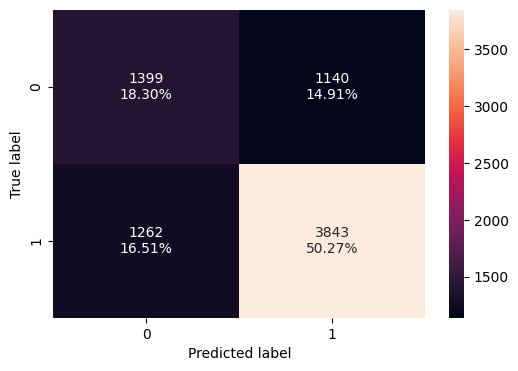

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [ ]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.685767  0.752791   0.771222  0.761895


* Bagging classifier with weight performs well on the training data but the performance drops significantly on test data indicating a huge overfitting.
* Let's check the performance after tuning.

### Tuning Bagging Classifier

In [ ]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {
              'base_estimator':[cl1],
              'n_estimators':[7,9,51,107],
              'max_features': [0.5,0.7,1],
              'max_samples': [0.7,0.9,None]
             }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score )

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = scorer, cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.7, max_samples=0.7, n_estimators=107,
                  random_state=1)

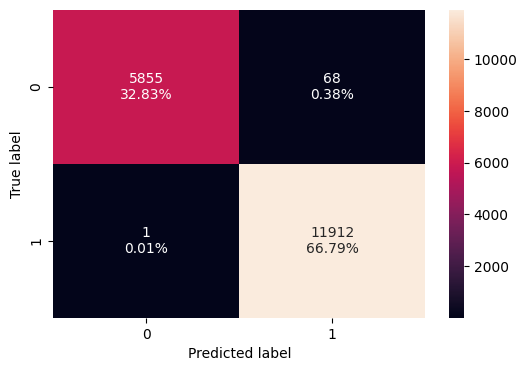

In [ ]:
confusion_matrix_sklearn(bagging_estimator, X_train,y_train)

In [ ]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.996131  0.999916   0.994324  0.997112


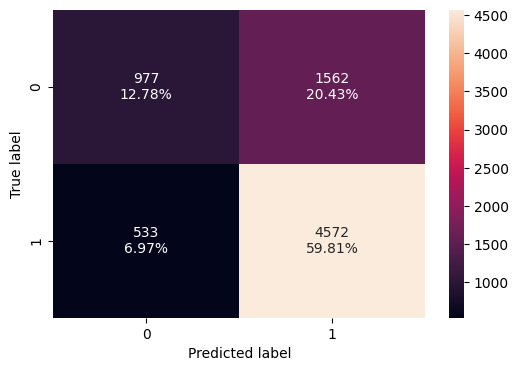

In [ ]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [ ]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.725929  0.895593   0.745354  0.813596


* Recall has improved but accuracy, precision, and F1 score have dropped significantly.

### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

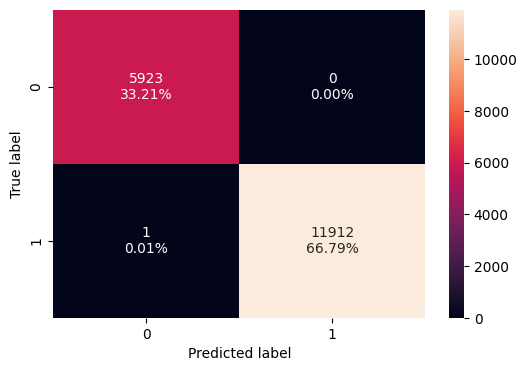

In [ ]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


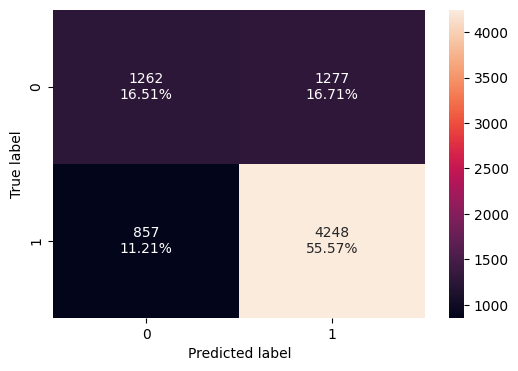

In [ ]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


* Random forest performs well on the training set but poorly in the model test showing overfitting.

**Random forest with class weights**

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.34,1:0.66}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.34, 1: 0.66}, random_state=1)

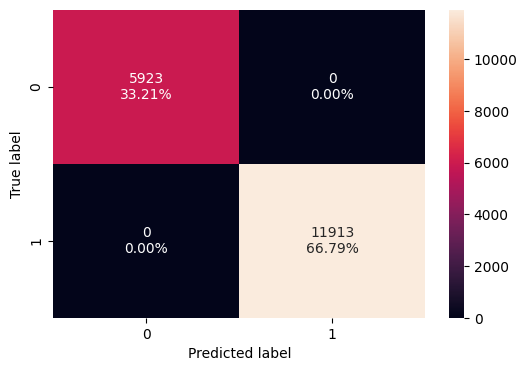

In [ ]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [ ]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


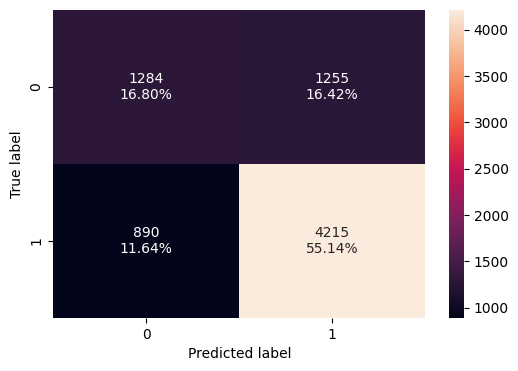

In [ ]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [ ]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.719388  0.825661   0.770567  0.797163


* Random forest has a perfect performance on training data but so poorly on testing showing a huge overfitting.

### Tuning Random Forest

In [ ]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(bootstrap=True, random_state=1, oob_score=True)

# Grid of parameters to choose from
parameters = {
            "n_estimators": np.arange(10,51,50),
            "min_samples_leaf": np.arange(1, 4),
            "min_samples_split": [150, 100, 400],
            "max_features": ['sqrt'],
            "max_samples": np.arange(0.4, 0.7, 0.1)
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)
# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring= scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, min_samples_split=100, n_estimators=10,
                       oob_score=True, random_state=1)

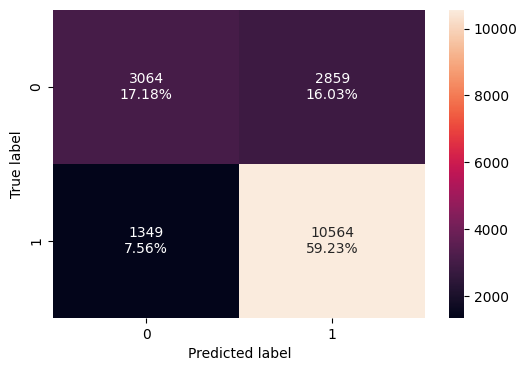

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train,y_train)

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.764073  0.886762   0.787007  0.833912


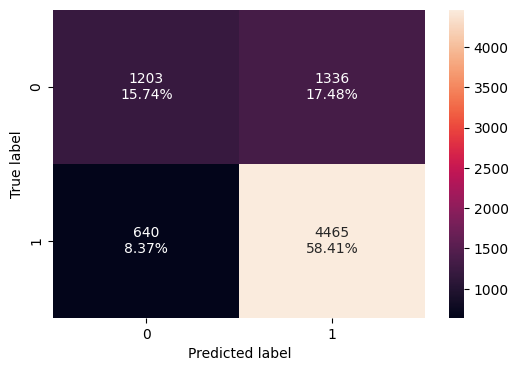

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [ ]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.741497  0.874633   0.769695  0.818815


* Random forest after tuning gives almost the same performance as un-tuned random forest.

**Plotting the feature importance of each variable**

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
education_of_employee_2         0.241371
has_job_experience_1            0.134292
prevailing_wage                 0.114525
education_of_employee_3         0.095277
no_of_employees                 0.064250
unit_of_wage_Year               0.059823
yr_of_estab                     0.055132
education_of_employee_4         0.041557
continent_Europe                0.040868
region_of_employment_Midwest    0.026305
region_of_employment_West       0.018431
region_of_employment_South      0.018293
full_time_position_Y            0.017937
requires_job_training_Y         0.015642
continent_North America         0.015075
continent_Asia                  0.014773
region_of_employment_Northeast  0.012962
continent_South America         0.006806
unit_of_wage_Month              0.002399
continent_Oceania               0.002314
unit_of_wage_Week               0.001969


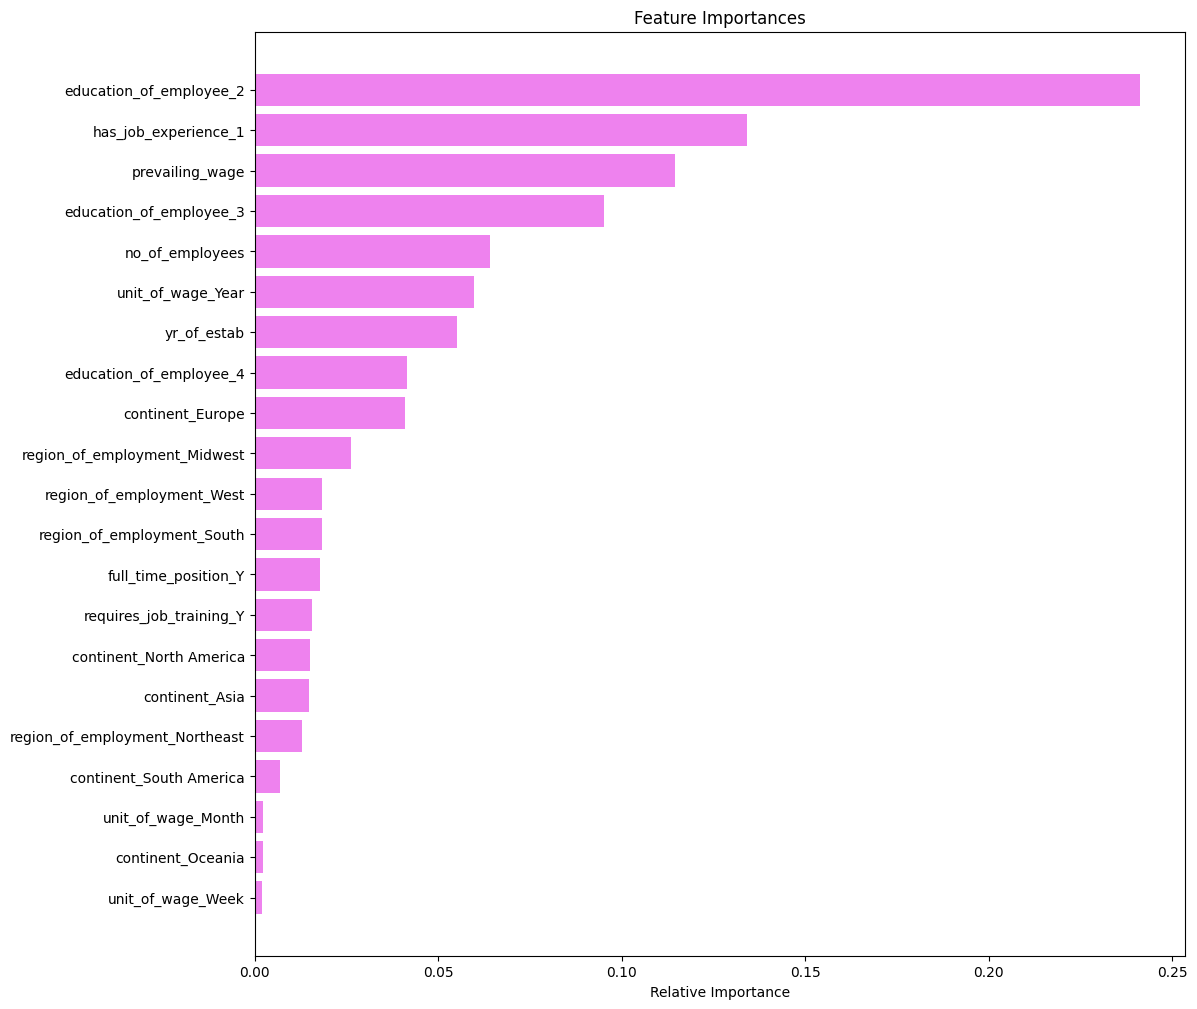

In [ ]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Boosting

####Adaboost Classifier

In [ ]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

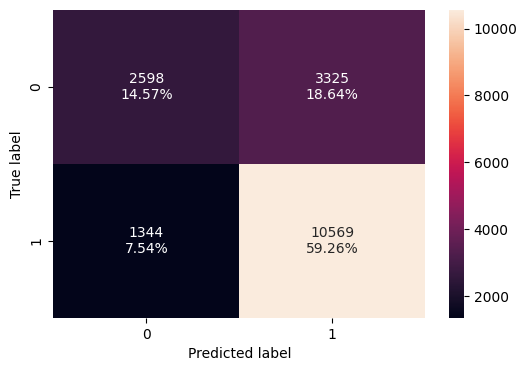

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_train,y_train)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


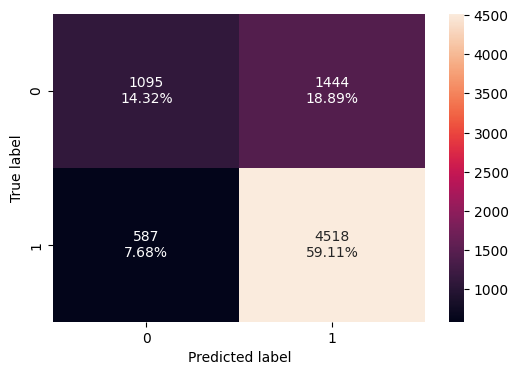

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_test,y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test,y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


* Adaboost generalized well but is giving not so good performance in terms of accuracy and precision.

### Tuning Adaboost Cassifier

In [ ]:

# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
     "base_estimator": [
        DecisionTreeClassifier(max_depth=1,random_state=1),
        DecisionTreeClassifier(max_depth=2,random_state=2),

    ],
    "n_estimators": np.arange(25,55,118),
    "learning_rate": np.arange(0.01,0.1,0.05),
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=2),
                   learning_rate=0.060000000000000005, n_estimators=25,
                   random_state=1)

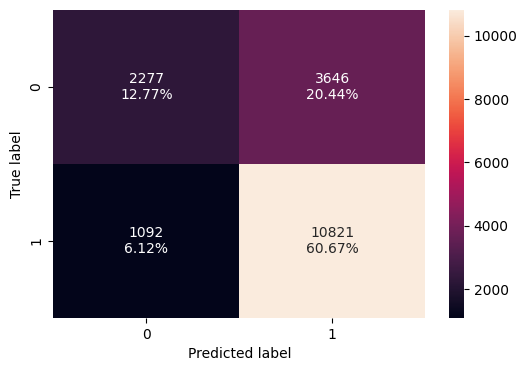

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train,y_train)

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.734357  0.908335   0.747978  0.820394


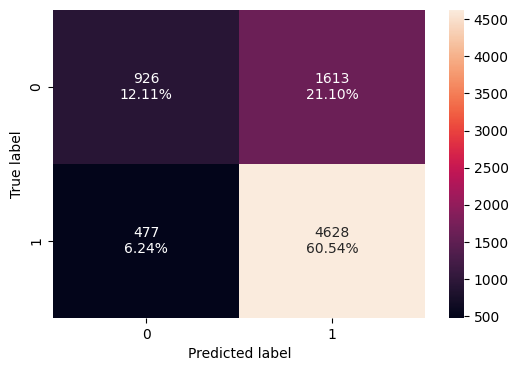

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test,y_test)

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test,y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.726583  0.906562   0.741548  0.815794


* There is not so much difference in the Adaboosting classifier after hyperparameter tuning.

**Plotting the feature importance of each variable**

In [ ]:
# importance of features in the tree building

print(pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
education_of_employee_2         0.297356
has_job_experience_1            0.196785
education_of_employee_3         0.142231
prevailing_wage                 0.111866
education_of_employee_4         0.111641
unit_of_wage_Year               0.081243
continent_Europe                0.051513
continent_Asia                  0.005561
continent_North America         0.001804
region_of_employment_Northeast  0.000000
unit_of_wage_Week               0.000000
unit_of_wage_Month              0.000000
region_of_employment_West       0.000000
region_of_employment_South      0.000000
no_of_employees                 0.000000
region_of_employment_Midwest    0.000000
requires_job_training_Y         0.000000
yr_of_estab                     0.000000
continent_South America         0.000000
continent_Oceania               0.000000
full_time_position_Y            0.000000


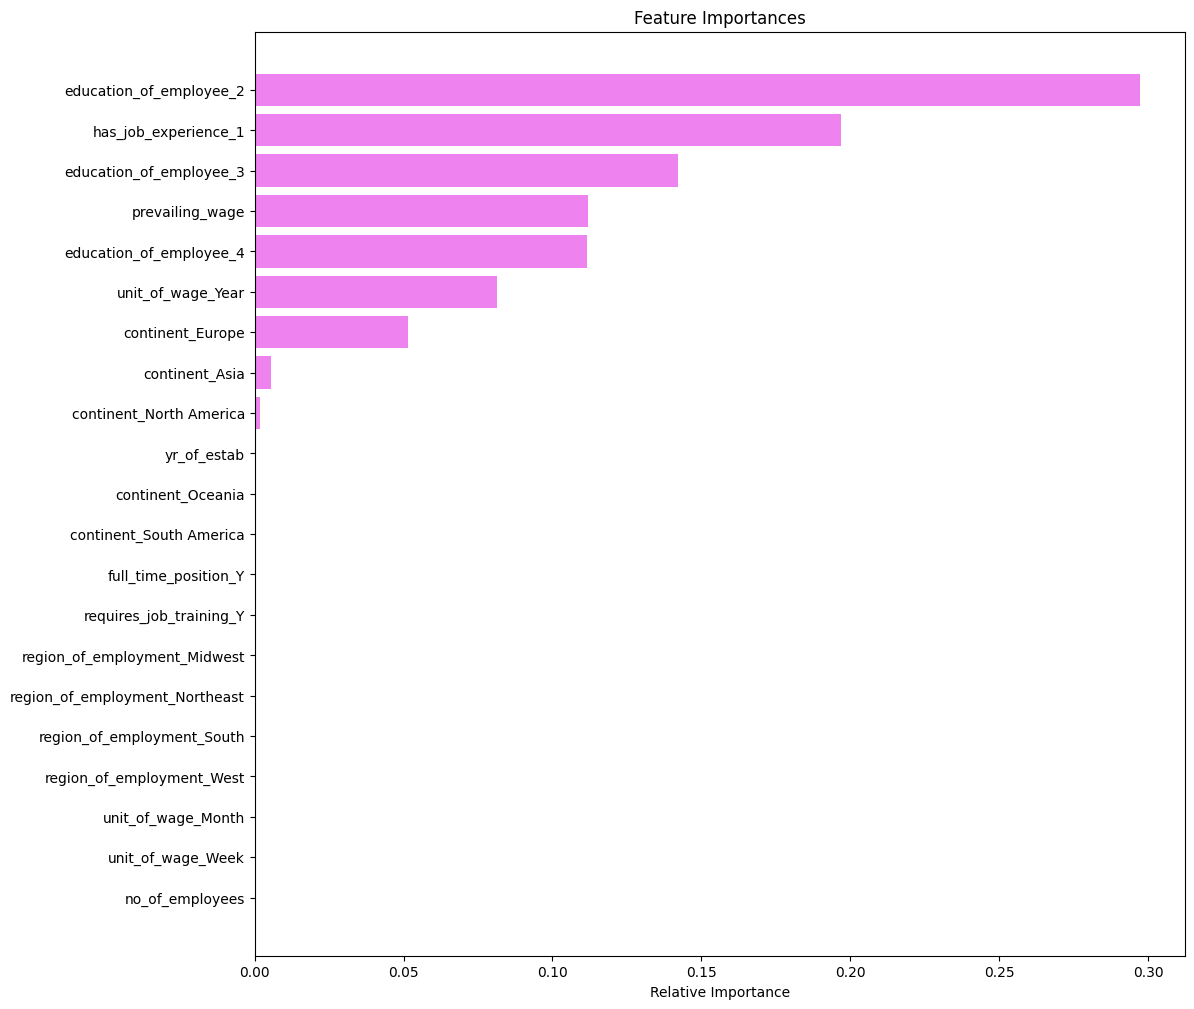

In [ ]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classifier

In [ ]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

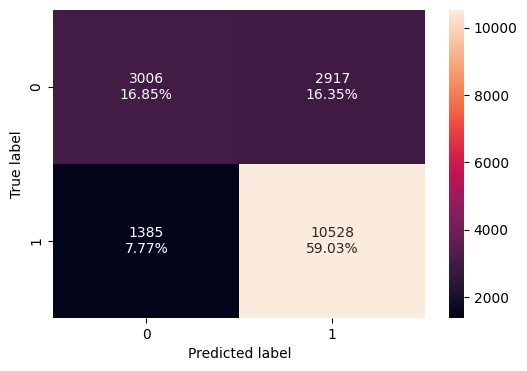

In [ ]:
confusion_matrix_sklearn(gb_estimator, X_train,y_train)

In [ ]:
gb_estimator_model_train_perf = model_performance_classification_sklearn(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


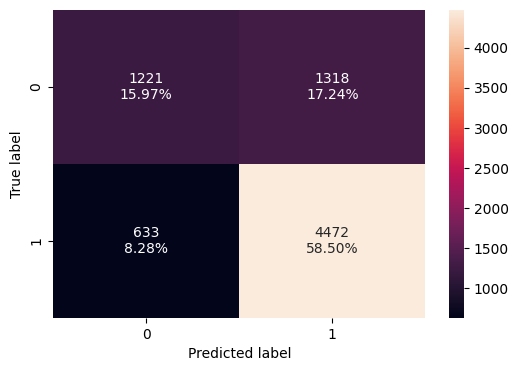

In [ ]:
confusion_matrix_sklearn(gb_estimator, X_test, y_test)

In [ ]:
gb_estimator_model_test_perf = model_performance_classification_sklearn(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


* Gradient boosting classifier model generalized well overall with decent F1_Score, but accuracy and precision are low.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
gb_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,101,25),
              'learning_rate': np.arange(0.01,0.1,0.05),
              'subsample':[0.7,0.9],
              'max_features':[0.7,0.8,0.9],
              'max_depth':[1,2]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.060000000000000005, max_depth=2,
                           max_features=0.9, random_state=1, subsample=0.7)

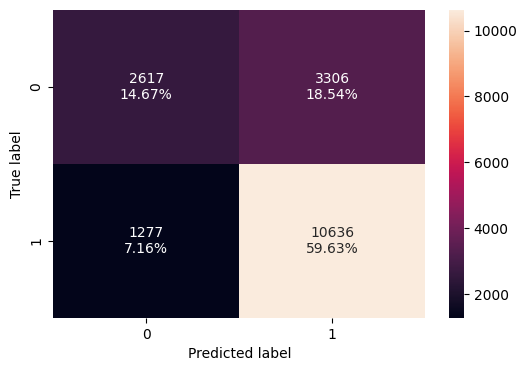

In [ ]:
confusion_matrix_sklearn(gb_tuned, X_train,y_train)

In [ ]:
gb_tuned_model_train_perf = model_performance_classification_sklearn(gb_tuned, X_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.743048  0.892806   0.762875  0.822742


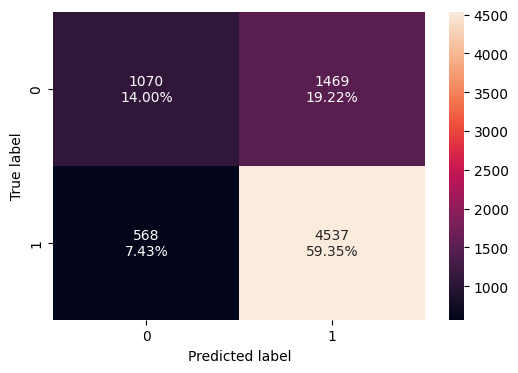

In [ ]:
confusion_matrix_sklearn(gb_tuned, X_test, y_test)

In [ ]:
gb_tuned_model_test_perf = model_performance_classification_sklearn(gb_tuned, X_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.733516  0.888737   0.755411  0.816668


In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
education_of_employee_2         0.316544
has_job_experience_1            0.176154
prevailing_wage                 0.121594
education_of_employee_3         0.115006
education_of_employee_4         0.082825
continent_Europe                0.053623
unit_of_wage_Year               0.041846
region_of_employment_Midwest    0.036512
region_of_employment_South      0.017817
region_of_employment_West       0.013144
continent_Asia                  0.007940
continent_North America         0.005949
region_of_employment_Northeast  0.004864
yr_of_estab                     0.003758
no_of_employees                 0.002424
requires_job_training_Y         0.000000
continent_South America         0.000000
unit_of_wage_Month              0.000000
unit_of_wage_Week               0.000000
continent_Oceania               0.000000
full_time_position_Y            0.000000


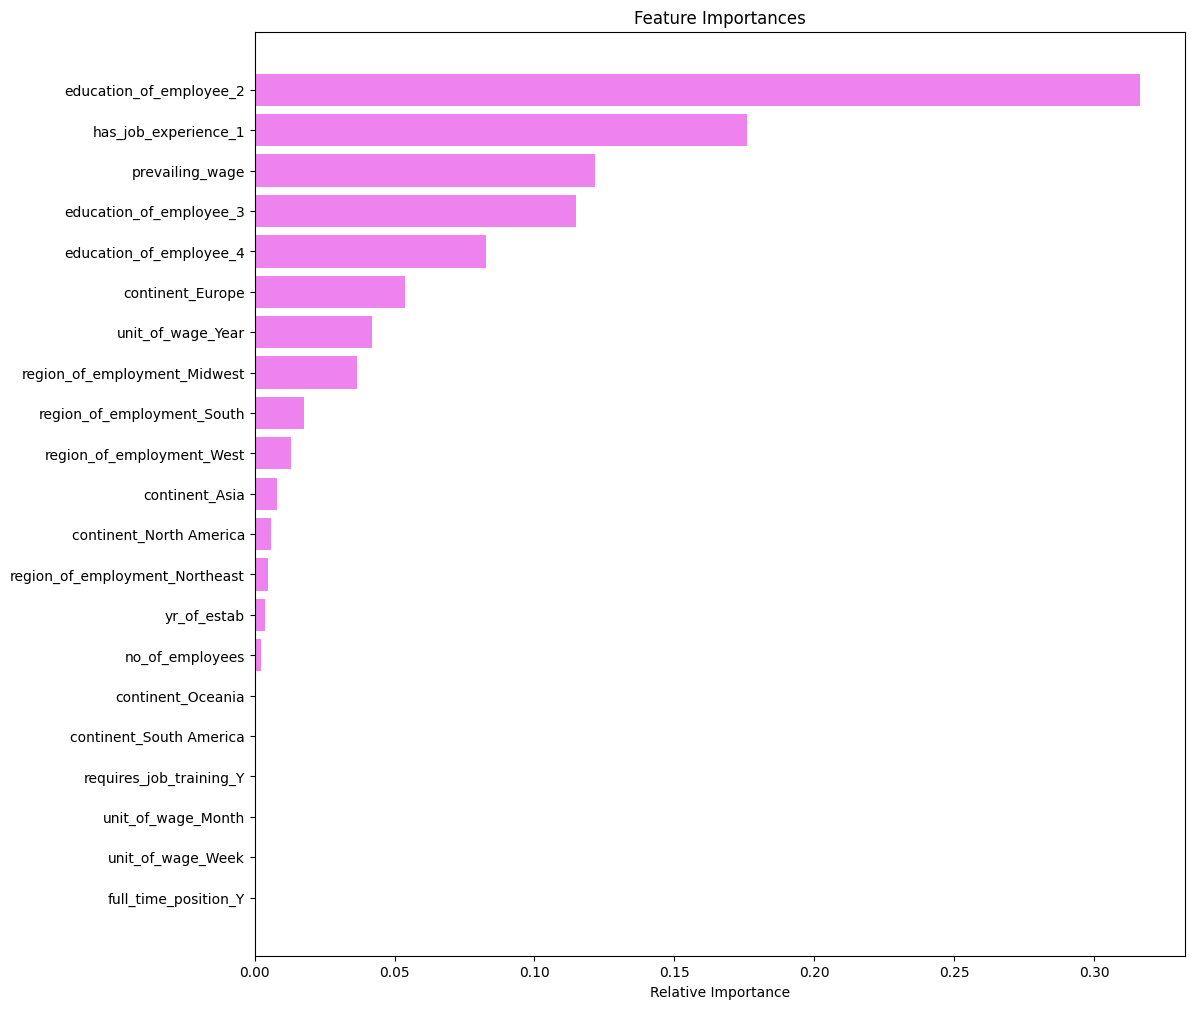

In [ ]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Gradient Boost Tuning education of employees higth school is the most important feature.

### XGBoost Classifier

In [ ]:
xgb_classifier=XGBClassifier(random_state=1, verbosity = 0)
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

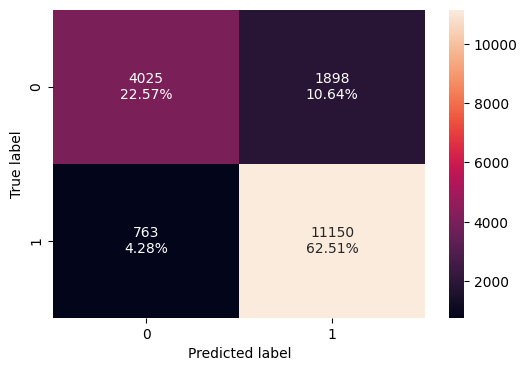

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_train,y_train)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
print("Training performance \n",xgb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.850807  0.935952   0.854537  0.893394


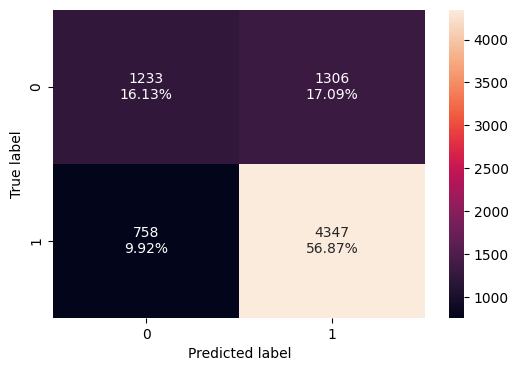

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test,y_test)
print("Testing performance \n",xgb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.729984  0.851518   0.768972  0.808143


* XGBoost Classifier model is showing overfitting.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, verbosity = 0)

# Grid of parameters to choose from
parameters = {'n_estimators': [50,101,30, 150],
              'subsample':[0.7,  0.9, 1],
              'gamma':[1, 3, 5],
              'scale_pos_weight':[1,2],
              'learning_rate':[0.01,0.1,0.05]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.75813  0.886007   0.781215  0.830318


In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.744898  0.87855   0.771281  0.821429


* XGBoosting after tuning is giving an acceptable performance.

## Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.34,
                                                                     1: 0.66},
                                                       max_depth=5,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=3,
                                                       min_samples_split=150,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_samples=0.6,
                                                       min_samples_split=100,
                                                       n_estimators=10,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gra...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

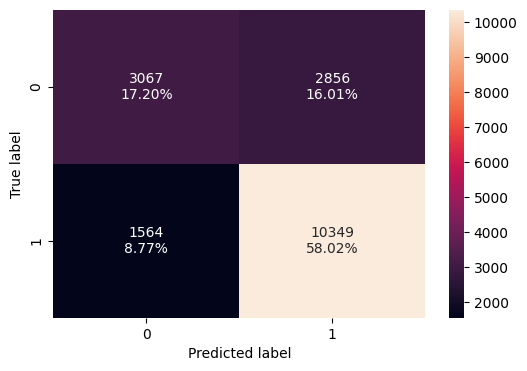

In [ ]:
confusion_matrix_sklearn(stacking_estimator, X_train, y_train)

In [ ]:
stacking_estimator_model_train_perf = model_performance_classification_sklearn(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.752187  0.868715   0.783718  0.824031


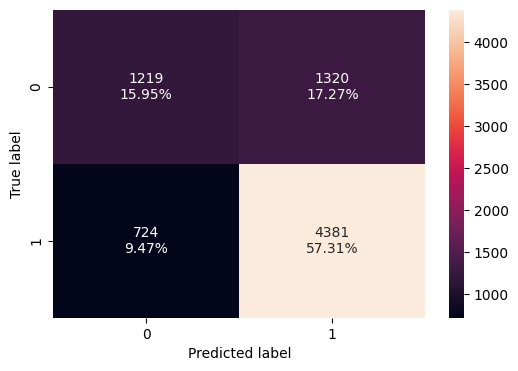

In [ ]:
confusion_matrix_sklearn(stacking_estimator, X_test, y_test)

In [ ]:
stacking_estimator_model_test_perf = model_performance_classification_sklearn(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.732601  0.858178   0.768462  0.810846


* Stacking is giving a good generalized performance.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_wt_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        rf_model_train_perf.T,
        rf_wt_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_estimator_model_train_perf.T,
        gb_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_estimator_model_train_perf.T
    ],
     axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Bagging Tuned",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Weighted Bagging Classifier,Bagging Tuned,Random Forest Classifier,Weighted Random Forest Classifier,Random Forest Tuned,Adaboost Classifier,Adaboost Tuned,Gradient Boost Classifier,Gradient Boost Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.984862,0.996131,0.999944,1.0,0.764073,0.738226,0.734357,0.758802,0.743048,0.850807,0.758130,0.752187
Recall,1.0,0.931923,0.985982,0.984974,0.999916,0.999916,1.0,0.886762,0.887182,0.908335,0.883740,0.892806,0.935952,0.886007,0.868715
Precision,1.0,0.720067,0.991810,0.992304,0.994324,1.000000,1.0,0.787007,0.760688,0.747978,0.783042,0.762875,0.854537,0.781215,0.783718
F1,1.0,0.812411,0.988887,0.988626,0.997112,0.999958,1.0,0.833912,0.819080,0.820394,0.830349,0.822742,0.893394,0.830318,0.824031


In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
     dtree_model_test_perf.T,
     dtree_estimator_model_test_perf.T,
     bagging_model_test_perf.T,
     bagging_wt_model_test_perf.T,
     bagging_estimator_model_test_perf.T,
     rf_model_test_perf.T,
     rf_wt_model_test_perf.T,
     rf_estimator_model_test_perf.T,
    ab_classifier_model_test_perf.T,
    abc_tuned_model_test_perf.T,
     gb_estimator_model_test_perf.T,
     gb_tuned_model_test_perf.T,
     xgb_classifier_model_test_perf.T,
     xgb_tuned_model_test_perf.T,
     stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Bagging Tuned",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Weighted Bagging Classifier,Bagging Tuned,Random Forest Classifier,Weighted Random Forest Classifier,Random Forest Tuned,Adaboost Classifier,Adaboost Tuned,Gradient Boost Classifier,Gradient Boost Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.685767,0.725929,0.720827,0.719388,0.741497,0.734301,0.726583,0.744767,0.733516,0.729984,0.744898,0.732601
Recall,0.742801,0.930852,0.764153,0.752791,0.895593,0.832125,0.825661,0.874633,0.885015,0.906562,0.876004,0.888737,0.851518,0.878550,0.858178
Precision,0.752232,0.715447,0.771711,0.771222,0.745354,0.768869,0.770567,0.769695,0.757799,0.741548,0.772366,0.755411,0.768972,0.771281,0.768462
F1,0.747487,0.809058,0.767913,0.761895,0.813596,0.799247,0.797163,0.818815,0.816481,0.815794,0.820927,0.816668,0.808143,0.821429,0.810846


* According to this data the XGBoost classifier after tuning has a better F1 score on test data.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
education_of_employee_2         0.384560
has_job_experience_1            0.127752
education_of_employee_3         0.073516
education_of_employee_4         0.059559
unit_of_wage_Year               0.049679
continent_Europe                0.049244
region_of_employment_Midwest    0.036545
region_of_employment_South      0.033954
prevailing_wage                 0.031424
region_of_employment_Northeast  0.025613
full_time_position_Y            0.020369
region_of_employment_West       0.020208
continent_Asia                  0.017604
continent_North America         0.013942
continent_South America         0.013725
requires_job_training_Y         0.013604
continent_Oceania               0.010056
yr_of_estab                     0.009699
no_of_employees                 0.008946
unit_of_wage_Month              0.000000
unit_of_wage_Week               0.000000


In [ ]:
feature_names = X_train.columns

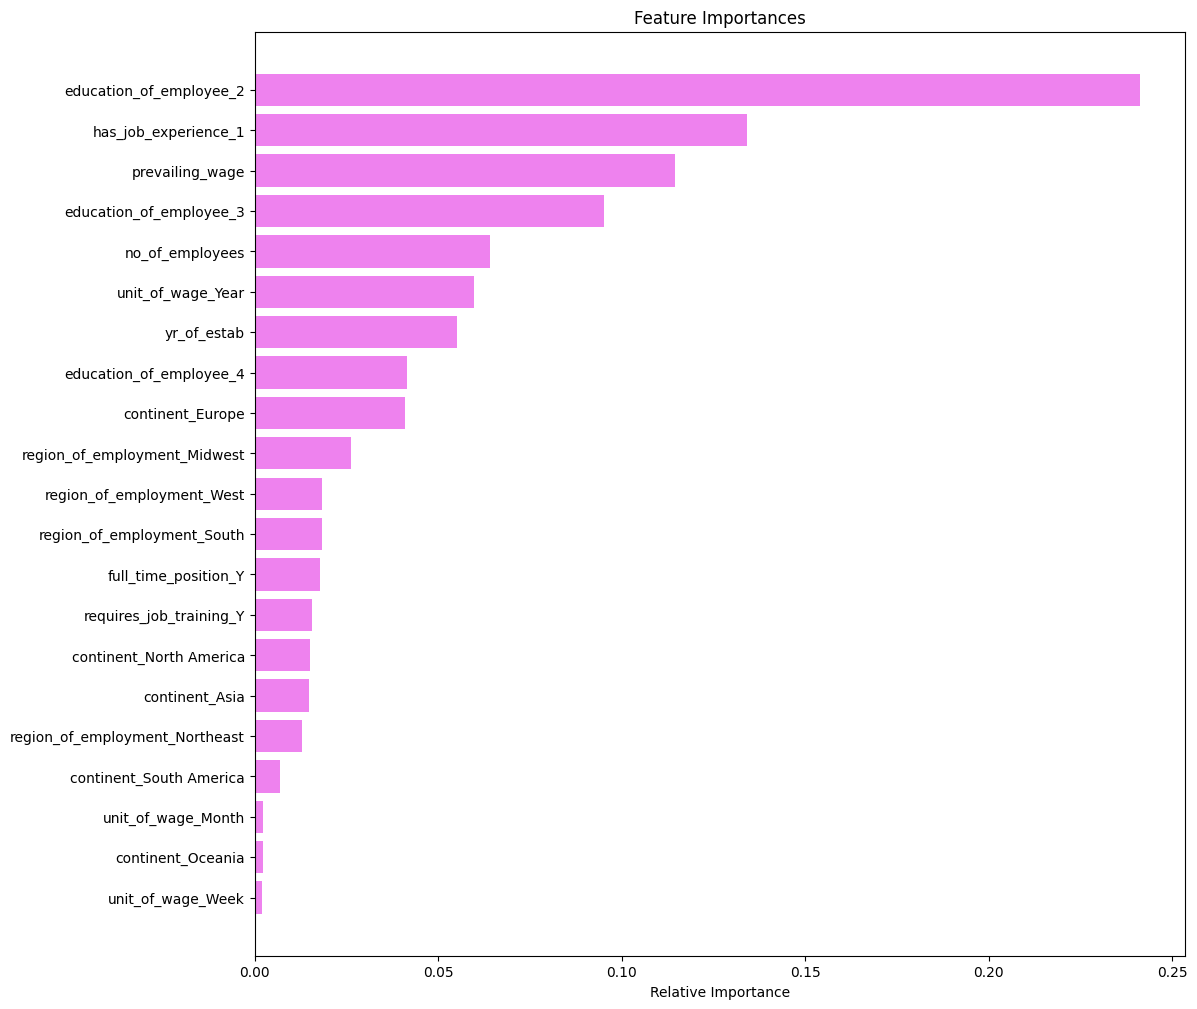

In [ ]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

* Education has a significant impact on visa certification (the applicants at least have to have high school), for employees
  with a bachelor's degree or higher education have more chances to get a visa.
* Job experience also plays a huge role in visa certification.
* Prevailing wage is an important feature.
* Being from the Euro continent alone is going to help.
* Region of employment south or west is also an important factor.

Recomendations:

* It would be beneficial to gather more information about the type of specialization of the employee and the type of company that requires fulfilling the position.
* It might be interesting to collect more information related to employee benefits to see if it changes depending on the unit of wage, and if this makes a difference in visa case status, to increase the accuracy of the prediction.